In [18]:
import numpy as np
from scipy.sparse import lil_matrix
import scipy.stats as sts
import numpy

In [19]:
cycledistfile = "cycleslensdistribution.txt"


In [20]:
cycledistdata = lil_matrix(np.loadtxt(cycledistfile),dtype = 'int', shape = (100000, 1000))

### Рассмотрим распределение числа циклов длины 4


In [28]:
k = 4
datalen4 = cycledistdata.transpose().getrow(k-1).toarray()[0]

In [29]:
datalen4

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

### Вычислим эмпирические частоты числа циклов длины 4

In [35]:
freqs = np.bincount(datalen4)/cycledistdata.shape[0]

In [31]:
maxvalue = datalen4.max()

In [33]:
probs = sts.poisson.pmf(np.arange(0, maxvalue+1), 1/k)

### Проверяем гипотезу о том, что выборка взята из распределения Пуассона с параметром $\frac{1}{4}$

In [36]:
sts.chisquare(freqs, probs)

Power_divergenceResult(statistic=3.3466430625255196e-05, pvalue=0.9999999999996554)

### Критерий хи-квадрат говорит, что значимых различий между выборкой и распределением буквально нет
----------------------------------------------


In [37]:
elementdist15input = "elementpositiondist.txt"

### Рассмотрим распределение 15-ого по счёту от нуля элемента в перестановках

In [ ]:
elementdist15data = np.loadtxt(elementdist15input, dtype = "int")

In [41]:
freqs = np.bincount(elementdist15data)/elementdist15data.shape[0]

In [42]:
sts.chisquare(freqs)

Power_divergenceResult(statistic=0.0109857758, pvalue=1.0)

### Критерий хи-квадрат говорит, что распределение позиций 15-ого элемента значительно совпадает с равномерным
### Посмотрим на гистограмму

(array([0.00099059, 0.00100501, 0.00101321, 0.00100551, 0.00099279,
        0.00100821, 0.00100791, 0.00100861, 0.00098088, 0.0009973 ]),
 array([   1. ,  100.9,  200.8,  300.7,  400.6,  500.5,  600.4,  700.3,
         800.2,  900.1, 1000. ]),
 <BarContainer object of 10 artists>)

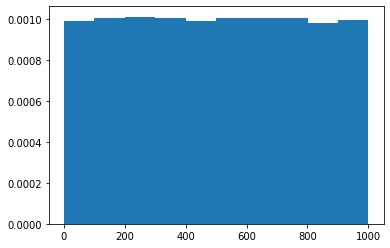

In [44]:
import matplotlib.pyplot as plt
plt.hist(elementdist15data, density=True)